In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import random

In [ ]:
fiftyComp=pd.read_excel('排名.xlsx')
row=pd.read_excel('1.xlsx')
fiftyComp['材料分类']=[0 for i in range(fiftyComp.shape[0])]
for i in range(fiftyComp.shape[0]):
    fiftyComp['材料分类'].loc[i]=row[row['供应商ID']==fiftyComp['供应商ID'].iloc[i]]['材料分类'].iloc[0]

In [3]:
#fiftyComp=fiftyComp.sort_values(by='材料分类')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

#sc=[]

In [ ]:
for i in range(40000,42000):
    up=i
    target=up
    ans=[]
    acc=[]
    for i in range(100):
        now=0
        cnt=0
        for i in range(fiftyComp.shape[0]):
            now+=fiftyComp.iloc[i]['企业最大产能']*random.uniform(0.9,1)*fiftyComp.iloc[i]['订单完成率']
            cnt+=1
            if now>=target:
                break
        ans.append(cnt)
        if now<target and cnt==402:
            acc.append(1)
    nums=1-sum(acc)/100
    sc.append(nums)

Text(0.5, 1.0, '最大产能为40000-41500立方米时402家供货商稳定供货的概率')

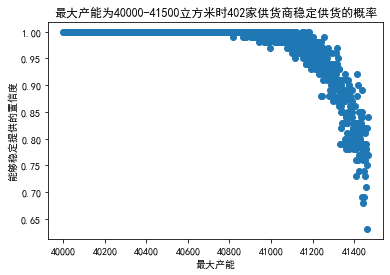

In [207]:
plt.scatter(range(40000,40000+len(sc)),sc)
plt.xlabel('最大产能')
plt.ylabel('能够稳定提供的置信度')
plt.title('最大产能为40000-41500立方米时402家供货商稳定供货的概率')

In [208]:
up=41000
nums=402
fifteenComp=fiftyComp.head(nums)
fifteenComp.shape[0]

402

In [ ]:
mx=fifteenComp['企业最大产能'].mean()*nums

In [ ]:
x=fifteenComp['材料分类'].value_counts().keys()
y=[fifteenComp['材料分类'].value_counts()[i] for i in x]
plt.title('选出50家供货商其供货材料分布图')
plt.xlabel('材料类别')
plt.ylabel('供应商数目')
for a,b in zip(x,y):
    plt.text(a, b+0.01, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.bar(x,y)


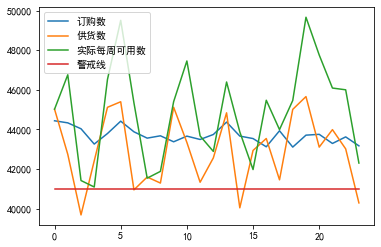

In [212]:
up=41000
rate={'A':0.6,'B':0.66,'C':0.72}
fifteenComp.sort_values(by=['材料分类'],inplace=True)
ans=[]
output=[up]
ding=[0]
real=[]
target=up
for j in range(1,25):
    res=[]
    res2=[]
    for i in range(fifteenComp.shape[0]):
        v=fifteenComp.iloc[i]['企业最大产能']*random.uniform(0.9,1.1)*fifteenComp.iloc[i]['订单完成率']
        if v<=target or 1:
            target-=v
            res.append(v*rate[fifteenComp.iloc[i]['材料分类']])
            res2.append(v)
        else:
            res.append(target*rate[fifteenComp.iloc[i]['材料分类']])
            res2.append(target)
            target=0
            
    ans.append(res)
    ding.append(sum(res2))
    op=sum(res2)*random.uniform(0.9,1.05)
    target=2.0*up-op
    real.append(op+(output[-1]-up))
    output.append(op)
plt.plot(range(24),ding[1:])
plt.plot(range(24),output[1:])
plt.plot(range(24),real)
plt.plot(range(24),[up]*24)
plt.xticks=[i for i in range(1,25)]
plt.legend(['订购数','供货数','实际每周可用数','警戒线'])

In [213]:
from numpy import transpose
data = ans
transposed = transpose(data).tolist()
dp={}
for i in range(nums):
    dp[fifteenComp['供应商ID'].iloc[i]]=transposed[i]
dingdan=pd.DataFrame(dp).T
dingdan

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
S152,3.263842,2.881741,3.002968,3.247958,3.157617,3.096332,2.920800,3.115663,3.031360,2.942990,...,3.114693,3.206216,3.145670,3.241229,2.959385,2.807847,3.262214,3.062026,2.985278,3.281090
S274,1.168008,1.347957,1.195401,1.297159,1.243421,1.371423,1.202328,1.223857,1.158504,1.329686,...,1.152672,1.160527,1.348310,1.286363,1.141163,1.221194,1.333232,1.382578,1.355319,1.280677
S123,56.247036,52.672652,56.985970,52.181026,58.951105,52.588901,57.064447,50.325164,51.675260,50.630758,...,49.930379,55.828213,53.157073,53.209782,49.535200,50.734897,49.599879,50.185040,55.515269,54.491188
S273,99.335822,112.423649,108.862262,102.561439,107.633516,114.397023,119.604505,117.215996,107.386997,99.711438,...,116.609726,118.272216,109.158081,119.840249,101.647326,113.020693,118.569501,111.669642,99.246303,99.103208
S211,1.125696,1.323782,1.180895,1.240467,1.113654,1.097171,1.091013,1.265014,1.138589,1.313814,...,1.110770,1.101041,1.217397,1.264337,1.234058,1.166286,1.283554,1.247616,1.111256,1.145913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S382,0.195067,0.182281,0.193973,0.198374,0.206654,0.173324,0.198546,0.170494,0.200927,0.201284,...,0.171111,0.176234,0.200033,0.180656,0.191346,0.195084,0.188734,0.197395,0.182373,0.205188
S011,0.860974,0.975170,0.931412,0.982147,1.003087,0.978876,0.935527,0.957743,0.968644,0.978486,...,0.885300,0.936608,0.975797,0.959766,0.859613,1.030395,0.852609,0.891831,0.933564,1.030160
S025,2.997079,3.122391,3.199939,2.933120,2.814932,3.184399,3.073331,2.727423,2.960790,2.970225,...,2.899030,2.821195,3.129752,3.144922,2.758019,3.209279,2.712110,3.112215,3.104029,3.255505
S228,1.594172,1.684464,1.404432,1.447859,1.422844,1.469445,1.628250,1.497839,1.495322,1.489513,...,1.513287,1.521602,1.583963,1.566513,1.657692,1.433663,1.423082,1.436493,1.390345,1.535639


In [214]:
fee=pd.read_excel('2.xlsx')

In [215]:
t2=fee.columns
avgfee=pd.DataFrame()
avgfee['转运商ID']=fee['转运商ID']
for i in range(1,25):
    avgfee[t2[i]]=[0 for i in range(fee.shape[0])]

In [216]:
for idx in range(fee.shape[0]):
    for i in range(0,24):
        a=[]
        for j in range(1,239,24):
            if fee[t2[j+i]].iloc[idx]!=0:
                a.append(fee[t2[j+i]].iloc[idx])
        avgfee[t2[i+1]].loc[idx]=pd.Series(a).mean()
t=avgfee.columns[1:]
for i in range(8):
    avgfee.loc[i]=avgfee.loc[i].fillna(avgfee[t].loc[i].mean())

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\18249\AppData\Local\Temp/ipykernel_20380/1053838765.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  avgfee[t2[i+1]].loc[idx]=pd.Series(a).mean()


In [217]:
avgfee.to_excel('fee_avg2.xlsx')
avgfee

,转运商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W015,W016,W017,W018,W019,W020,W021,W022,W023,W024
0,T1,1.858110,2.165130,1.410360,1.328640,1.070760,1.211510,1.162390,1.36925,2.233130,...,2.265730,2.540450,2.187330,1.957770,1.785390,1.923760,1.875590,1.811840,1.947860,1.840190
1,T2,0.868770,1.117000,0.691470,1.010610,0.815580,1.134720,0.868770,1.01062,0.992880,...,0.797850,1.046070,0.851040,0.620550,0.868770,1.010610,0.868770,0.780120,0.868770,0.780120
2,T3,0.118700,0.453200,0.109250,0.259000,0.100340,0.582700,0.125878,0.16190,0.137562,...,0.111511,0.453200,0.129489,0.388500,0.121400,0.161900,0.117337,0.906400,0.119780,0.388500
3,T4,0.521057,1.541750,1.796900,1.018600,1.207550,1.361300,1.354900,1.80440,1.383700,...,1.401612,0.832662,1.402688,1.262786,1.168217,2.532120,1.584680,1.834025,1.755025,2.431867
4,T5,2.299728,0.579700,2.299728,2.299728,2.299728,2.299728,2.299728,0.28990,2.983083,...,3.369575,3.478257,2.971038,3.405800,1.811600,1.594200,0.579700,0.289900,0.289900,4.637700
5,T6,0.006900,0.036770,0.049220,3.586250,2.514610,5.000000,0.179620,0.11347,0.072910,...,0.008880,0.008350,0.013630,0.004770,0.006660,0.004578,0.020800,0.003700,0.001720,0.002800
6,T7,1.132070,1.083170,1.432560,1.474470,1.705100,1.544380,1.222910,1.34173,2.090140,...,2.499300,3.926270,3.996160,2.397620,2.065340,2.006300,2.215930,2.890630,1.785810,1.771840
7,T8,0.644080,1.001179,1.001179,1.001179,0.762733,1.118660,0.559340,1.08475,1.305070,...,0.593240,1.898320,5.000000,0.661020,0.564989,0.711880,0.576290,0.661030,0.677980,0.745780


In [218]:
a=list(avgfee.columns[1:])
#a.insert(0,'供应商ID')
dingdan.columns=a
pd.DataFrame(dp).T.to_excel('p4_dingdan.xlsx')

In [219]:
p2_convey=pd.DataFrame()
p2_convey['供应商ID']=fifteenComp['供应商ID']
for i in range(24):
    p2_convey[avgfee.columns[1+i]]=[[] for i in range(p2_convey.shape[0])]

In [220]:
t3=avgfee.columns
p2_convey

,供应商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W015,W016,W017,W018,W019,W020,W021,W022,W023,W024
103,S152,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
160,S274,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
24,S123,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
127,S273,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
128,S211,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,S382,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
186,S011,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
102,S025,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
233,S228,[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [221]:
vt=[]
fee['订单数']=range(fee.shape[0])
for i in range(fee.shape[0]):
    fee['订单数'].loc[i]=240
    if 0 in fee[fee.columns[1:]].loc[i].value_counts().keys():
        fee['订单数'].loc[i]=240-fee[fee.columns[1:]].loc[i].value_counts()[0]
    vt.append(fee['订单数'].loc[i])
alldingdan=sum(vt)
fee['订单数']=fee['订单数']/alldingdan
fee['订单数']=1/fee['订单数']
fee['订单数']=fee['订单数']/max(fee['订单数'])
mp=dict(zip(p2_convey['供应商ID'].to_list(),p2_convey['供应商ID'].keys()))
dingdan=pd.DataFrame(dp).T
a=list(avgfee.columns[1:])
#a.insert(0,'供应商ID')
dingdan.columns=a
ans=[{} for i in range(24)]
for i in range(24):
    convey=[0 for i in range(8)]
    tp=avgfee.sort_values(by=[t3[i+1]])[t3[i+1]]
    key=list((avgfee[t3[4]]*fee['订单数']).sort_values().keys())
    comp=list(dingdan[t3[i+1]].keys())
    nowDingdan=dingdan[t3[i+1]].copy()
    while comp:
        nowCom=comp.pop()
        if nowDingdan[nowCom]>0:
            for j in range(8):
                if convey[j]>=6000:
                    p2_convey[t3[i+1]][mp[nowCom]].append(0)
                elif nowDingdan[nowCom]+convey[j]<=6000:
                    p2_convey[t3[i+1]][mp[nowCom]].append(nowDingdan[nowCom])
                    convey[j]+=nowDingdan[nowCom]
                    nowDingdan[nowCom]=0
                else:
                    p2_convey[t3[i+1]][mp[nowCom]].append(0)
                    '''
                    p2_convey[t3[i+1]][mp[nowCom]].append(6000-convey[j])
                    nowDingdan[nowCom]-=(6000-convey[j])
                    convey[j]=6000'''
        #p2_convey[t3[i+1]][mp[nowCom]]=pd.DataFrame(p2_convey[t3[i+1]][mp[nowCom]]).values
        ans[i][nowCom]=p2_convey[t3[i+1]][mp[nowCom]]
        if ans[i][nowCom]==[]:ans[i][nowCom]=[0 for i in range(8)]
        

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [222]:
p2_convey.to_excel('4convey.xlsx')
p2_convey

,供应商ID,W001,W002,W003,W004,W005,W006,W007,W008,W009,...,W015,W016,W017,W018,W019,W020,W021,W022,W023,W024
103,S152,"[0, 0, 0, 3.2638422090241748, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 2.881741371037849, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.0029678229282557, 0.0, 0.0, 0.0]","[0, 0, 0, 3.2479575302350976, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.157616636317888, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.0963323097282154, 0.0, 0.0, 0.0]","[0, 0, 0, 2.9208002244743247, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.115662904008644, 0.0, 0.0, 0.0]","[0, 0, 0, 3.03136014187673, 0.0, 0.0, 0.0, 0.0]",...,"[0, 0, 0, 0, 3.114693099626259, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.206216386213194, 0.0, 0.0, 0.0]","[0, 0, 3.145670201474664, 0.0, 0.0, 0.0, 0.0, ...","[0, 0, 0, 0, 3.241229081590677, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 2.9593845554457077, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 2.807847128097874, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 3.2622141485139897, 0.0, 0.0, 0.0]","[0, 0, 0, 3.0620259022798666, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 2.9852783854520855, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 3.281090499543319, 0.0, 0.0, 0.0, 0.0]"
160,S274,"[0, 0, 0, 1.168008136512815, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.3479568738669148, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.1954006342282772, 0.0, 0.0, 0.0]","[0, 0, 0, 1.2971588803241805, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.2434205107420946, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.3714234665739768, 0.0, 0.0, 0.0]","[0, 0, 0, 1.2023276361731414, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.2238570294527655, 0.0, 0.0, 0.0]","[0, 0, 0, 1.1585039687983167, 0.0, 0.0, 0.0, 0.0]",...,"[0, 0, 0, 0, 1.152671644091558, 0.0, 0.0, 0.0]","[0, 0, 0, 1.160527312579644, 0.0, 0.0, 0.0, 0.0]","[0, 0, 1.3483103027232763, 0.0, 0.0, 0.0, 0.0,...","[0, 0, 0, 0, 1.2863633016636848, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.141163018078446, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.2211944637126348, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 1.3332320507582647, 0.0, 0.0, 0.0]","[0, 0, 0, 1.3825775458816356, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 1.3553187004108729, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 1.280677459193923, 0.0, 0.0, 0.0, 0.0]"
24,S123,"[0, 0, 0, 56.2470356029554, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 52.672652387884774, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 56.98596955709002, 0.0, 0.0, 0.0]","[0, 0, 0, 52.18102643693684, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 58.951105022229385, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 52.58890132570621, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 57.06444704057909, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 50.32516435987794, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 51.67526031498682, 0.0, 0.0, 0.0]",...,"[0, 0, 0, 0, 49.93037873717525, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 55.82821302271935, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 53.157073112654935, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 53.20978247332692, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 49.53520046650055, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 50.73489698341214, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 49.59987856729015, 0.0, 0.0, 0.0]","[0, 0, 0, 50.18503953382547, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 55.51526864210166, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 54.491187722105785, 0.0, 0.0, 0.0]"
127,S273,"[0, 0, 0, 0, 99.33582216745366, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 112.42364943446678, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 108.86226211263497, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 102.56143942019683, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 107.6335159602631, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 114.39702266015016, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 119.60450507859989, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 117.21599647543191, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 107.38699692360615, 0.0, 0.0, 0.0]",...,"[0, 0, 0, 0, 116.60972608050156, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 118.27221598800281, 0.0, 0.0, 0.0]","[0, 0, 0, 109.15808104623798, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 119.84024919543855, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 101.64732640346473, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 113.02069290854028, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 118.56950079905113, 0.0, 0.0, 0.0]","[0, 0, 0, 111.66964174577396, 0.0, 0.0, 0.0, 0.0]","[0, 0, 0, 0, 99.2463029967167, 0.0, 0.0, 0.0]","[0, 0, 0, 99.10320790266064, 0.0, 0.0, 0.0, 0.0]"
128,S211,"[0, 0, 0, 1.12569574648

In [223]:
w1=pd.DataFrame(ans[0]).T.reset_index()
w2=pd.DataFrame(ans[1]).T.reset_index()
a=pd.merge(w1,w2,on='index')
for i in range(2,len(ans)):
    a=pd.merge(a,pd.DataFrame(ans[i]).T.reset_index(),on='index')

C:\Users\18249\AppData\Local\Temp/ipykernel_20380/3799567541.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'3_x', '6_x', '7_x', '5_x', '2_x', '4_x', '0_x', '1_x'} in the result is deprecated and will raise a MergeError in a future version.
  a=pd.merge(a,pd.DataFrame(ans[i]).T.reset_index(),on='index')


In [224]:
p2_c=pd.read_excel('P2_c.xlsx')
p2_c=pd.merge(p2_c,a,on='index',how='outer')
p2_c=p2_c.fillna(0)
p2_c.to_excel('4convey2.xlsx')

In [ ]:
p2_c

In [227]:
p2_dingdan=pd.read_excel('p2_dingdan.xlsx')

In [228]:
p2_dingdan

,index,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,S201,988.683946,992.670911,943.662330,965.517555,992.305792,951.440138,991.880753,975.512468,973.177974,...,971.286147,943.645915,935.481671,950.556834,931.787653,978.365889,951.765577,940.108145,955.916564,978.567625
1,S307,603.490834,587.976345,601.631327,588.041682,594.224655,606.895284,608.608007,599.650208,613.425566,...,619.947490,601.839221,620.775097,589.936518,604.860569,607.703788,592.890076,595.321208,601.170136,585.518508
2,S348,561.830613,554.444783,559.140326,562.482957,571.316506,580.012877,565.897034,552.170927,570.985641,...,581.205934,549.563730,545.766416,563.661165,566.313237,553.410481,556.999519,568.417214,559.753100,577.229454
3,S275,933.618002,937.001356,937.241359,987.755081,940.013826,974.332128,986.038163,962.046977,974.544855,...,959.364150,962.559471,948.438904,998.295565,947.817588,997.706261,948.999986,946.200620,997.225100,989.939150
4,S282,1228.952756,1227.545401,1304.707936,1242.322023,1223.411209,1229.101933,1240.394070,1291.362998,1240.692065,...,1241.632768,1239.044718,1268.157656,1297.227725,1278.331378,1299.910416,1274.155325,1231.324298,1251.372780,1303.718501
5,S395,594.040171,618.087731,598.364853,578.060843,597.692702,610.342245,603.597821,586.576331,590.609716,...,584.465731,603.235663,614.573170,618.866553,599.015031,615.040558,582.161001,582.281647,618.734779,588.333237
6,S229,2170.209698,2206.719479,2160.270916,2222.798920,2168.007384,2233.100543,2198.510208,2220.544801,2141.305822,...,2109.920563,2227.759286,2137.835397,2204.905997,2119.481502,2135.846068,2175.329460,2191.421176,2184.542413,2174.495603
7,S338,258.781068,273.478036,275.273741,261.153280,263.905258,275.018939,258.588531,259.676061,269.540049,...,272.151234,268.740710,266.068322,266.092569,275.558227,260.718597,267.636984,270.637721,267.866930,274.242806
8,S364,201.528623,201.216288,201.405904,197.379616,205.392254,204.620104,201.348028,207.767802,202.422525,...,201.673398,209.531514,210.637949,211.674657,203.541073,199.273759,206.756157,199.966145,205.728698,202.999538
9,S139,1127.961906,1167.097756,1135.808330,1113.908755,1136.393037,1170.160268,1094.069881,1117.307909,1144.194297,...,1170.785180,1104.440129,1110.939755,1148.467660,1154.249662,1155.309057,1155.654652,1113.689710,1145.715072,1101.806339


In [233]:
row1=pd.DataFrame(row['供应商ID'])
row1.columns=['index']
row1

,index
0,S001
1,S002
2,S003
3,S004
4,S005
...,...
397,S398
398,S399
399,S400
400,S401


In [234]:
bb=pd.merge(row1,p2_dingdan,on='index',how='outer')

In [236]:
bb=bb.fillna(0)
bb.to_excel('p2_dingdan2.xlsx')

In [5]:
row=[random.uniform(18842,21530) for i in range(24)]

In [17]:
new=list(map(lambda x: x*random.uniform(0.85,1.02),row))

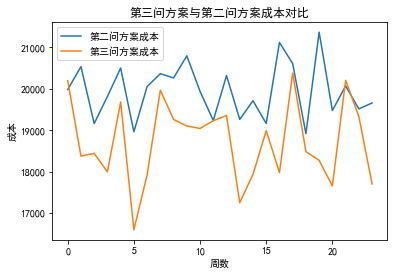

In [26]:
plt.plot(range(24),row)
plt.plot(range(24),new)
plt.xlabel('周数')
plt.ylabel('成本')
plt.title('第三问方案与第二问方案成本对比')
plt.legend(['第二问方案成本','第三问方案成本'])
